<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/MLA4_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 4**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Include imports for tree

In [80]:
from sklearn import tree
from sklearn.tree import export_text

from sklearn.tree import DecisionTreeRegressor

In [81]:
tree_reg = DecisionTreeRegressor

In [82]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [83]:
from sklearn import set_config
set_config(display='diagram')

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

In [85]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#Load the banknote_authentication.csv into a data frame named df.

In [86]:
df = pd.read_csv('/content/gdrive/My Drive/CS430/banknote_authentication.csv')

In [87]:
df.sample(1)


,variance,skewness,curtosis,entropy,forgery
426,-1.5222,10.8409,2.7827,-4.0974,0


#Create a data frame called X of your inputs that includes all columns except date and forgery.


In [88]:
X = df.iloc[:,0:-1]
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


#Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.


In [89]:
y = df[['forgery']]
y

,forgery
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

#Create a column transformer that will MinMax scale the numerical variables 


In [91]:
num_attributes = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attributes),]
                  )

#Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.


In [92]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

#Run the pipeline to fit the DecisionTreeClassification model.


In [93]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [94]:
y_pred = pipeline.predict(X_test)

#Call the plot_cm function to generate the confusion matrix.


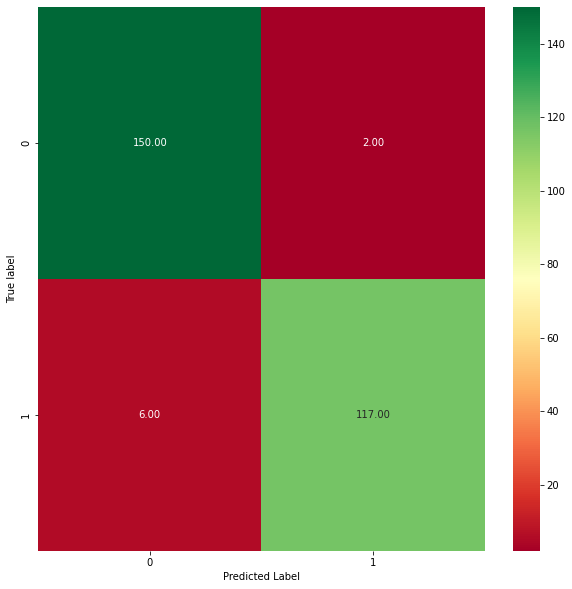

In [95]:
plot_cm(y_test,y_pred)


#Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.


In [96]:
print("Precision: ", precision_score(y_test,y_pred))  
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.9831932773109243
Recall: 0.9512195121951219
F1 Score: 0.9669421487603305


These results are all very excellent. A precision score of .98 is almost as good as you can ask for, and the very high recall score is encouraging too. Both of these high values are reflected by the F1 score which is also high and exceptional. 

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting whether or not a banknote is a forgery.


Given the very good Precision, Recall, and F1 scores, I would feel very comfortable using Decision Tree Classification for predicting if a bank note is forged or not. In this instace, the recall and precision scores are very high. This means that there is a relatively small number of instances where there is a false negative or a false positive, compared to the true positives/negatives. I would definitely feel confident using this model. 

#*Part 2 - Decision Tree Regression*

#Load the Steel_industry_data.csv into a data frame named df.


In [97]:
df = pd.read_csv('/content/gdrive/My Drive/CS430/Steel_industry_data.csv')

In [98]:
df.sample(3)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
4609,18/02/2018 00:30,3.10,3.35,0.00,0.0,67.92,100.00,1800,Weekend,Sunday,Light_Load
8470,30/03/2018 05:45,3.20,4.07,0.00,0.0,61.81,100.00,20700,Weekday,Friday,Light_Load
18902,16/07/2018 21:45,3.82,0.00,16.34,0.0,100.00,22.76,78300,Weekday,Monday,Medium_Load


#Rename the columns according to Table 1: Columns Names.


In [99]:
df.rename(columns={"Usage_kWh": "usage_kwh", "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh", "Lagging_Current_Power_Factor": "lag_current_pwr", "Leading_Current_Power_Factor": "lead_current_pwr", "NSM": "nsm", "WeekStatus": "week_status", "Day_of_week": "day_of_week", "Load_Type": "load_type",}, inplace=True)
df.sample(3)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
5379,26/02/2018 01:00,3.85,3.46,0.00,0.0,74.38,100.00,3600,Weekday,Monday,Light_Load
25717,25/09/2018 21:30,2.70,0.00,11.48,0.0,100.00,22.89,77400,Weekday,Tuesday,Light_Load
28502,24/10/2018 21:45,3.92,0.00,17.24,0.0,100.00,22.17,78300,Weekday,Wednesday,Medium_Load


#Create a data frame called X of your inputs that includes all columns except date and usage_kwh.


In [100]:
X = df.iloc[:,2:]
X

,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


#Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.


In [101]:
y = df[['usage_kwh']]
y

,usage_kwh
0,3.17
1,4.00
2,3.24
3,3.31
4,3.82
...,...
35035,3.85
35036,3.74
35037,3.78
35038,3.78


#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

#Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).


In [103]:
num_attributes = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attributes = ['week_status', 'day_of_week', 'load_type']

col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attributes),
                               ('num',MinMaxScaler(), num_attributes),]
                  )

#Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.


In [104]:
pipeline_reg = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree_reg',tree.DecisionTreeRegressor(max_depth=5))
                     ])

#Run the pipeline to fit the DecisionTreeRegression.


In [105]:
pipeline_reg.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree_reg', DecisionTreeRegressor(max_depth=5))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [106]:
y_pred = pipeline_reg.predict(X_test)


#Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.


In [107]:
y_train_pred = pipeline_reg.predict(X_train)

train_RMSE = mean_squared_error(y_train, y_train_pred)**(0.5)
test_RMSE = mean_squared_error(y_test, y_pred)**(0.5)

In [108]:
print("Train RMSE: ", train_RMSE)
print("Test RMSE:", test_RMSE)

Train RMSE:  3.5273918239070388
Test RMSE: 3.636667980251621


In this instance using the Decision Tree Regressor model, the root mean square errors for the train and test data are very similar. They are different by a value of 0.1. Having RMSE's that are close to each other is an encouraging sign. It shows that the predicted data is similar to the data that the model was trained on.

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.


Given the close nature of the train and test RMSE's, I would feel comfortable using decision tree regression on this data set. This is encouraging because the test data should have similar results to the training dataset. In this case, they are very close meaning the predictions are fairly accurate to the training set. 